# Before you start :
   - These exercises are related to the Pivot table and correlation lessons.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in the `your-code` folder of this lab.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly enjoy the process!!!

#### Import all the libraries that are necessary.

In [1]:
# your answer here
import pandas as pd
import numpy as np

# Challenge 1

#### Open the ` Employee.csv` file and name your dataset `employee`.

In [2]:
# your answer here
employee=pd.read_csv('data/Employee.csv')
employee

,Name,Department,Education,Gender,Title,Years,Salary
0,Jose,IT,Bachelor,M,analyst,1,35
1,Maria,IT,Master,F,analyst,2,30
2,David,HR,Master,M,analyst,2,30
3,Sonia,HR,Bachelor,F,analyst,4,35
4,Samuel,Sales,Master,M,associate,3,55
5,Eva,Sales,Bachelor,F,associate,2,55
6,Carlos,IT,Master,M,VP,8,70
7,Pedro,IT,Phd,M,associate,7,60
8,Ana,HR,Master,F,VP,8,70


#### What's the mean salary by department?
Hint : There are 2 ways to do it - one way is with and the other way is without pivot tables. Do it both ways. 


In [3]:
# Method 1
# your answer here
employee.groupby('Department').mean().reset_index()

,Department,Years,Salary
0,HR,4.666667,45.00
1,IT,4.500000,48.75
2,Sales,2.500000,55.00


In [4]:
# Method 2
# your answer here
mean_salary=(pd.pivot_table(employee,values='Salary',index='Department',aggfunc=np.mean)).reset_index()
mean_salary

,Department,Salary
0,HR,45.00
1,IT,48.75
2,Sales,55.00


#### We want now to group the data by more than one column. Use Pandas pivot table function to select the mean salary by department and title.

In [5]:
# your answer here
mean_salary=pd.pivot_table(employee,values='Salary',index=['Department','Title'],aggfunc=np.mean)
mean_salary

Salary
Department Title            
HR         VP           70.0
           analyst      32.5
IT         VP           70.0
           analyst      32.5
           associate    60.0
Sales      associate    55.0

#### We want to display the number of years of work experience and the salary for each Title. Add Years as a column in your pivot table.
*Hint: Use Pandas doc(see References in README.md) to explore the pivot_table() arguments*

In [6]:
# your answer here
result=pd.pivot_table(employee,values=['Salary','Years'],index=['Department','Title'],aggfunc=np.mean)
result

Salary  Years
Department Title                   
HR         VP           70.0    8.0
           analyst      32.5    3.0
IT         VP           70.0    8.0
           analyst      32.5    1.5
           associate    60.0    7.0
Sales      associate    55.0    2.5

#### We want to know the information about the mean salary and number of employees in each department and for each job title.

In [7]:
# your answer here
result=pd.pivot_table(employee,values=['Salary','Name'],index=['Department','Title'],aggfunc={'Salary':np.mean,'Name':np.count_nonzero})
result

Name  Salary
Department Title                  
HR         VP            1    70.0
           analyst       2    32.5
IT         VP            1    70.0
           analyst       2    32.5
           associate     1    60.0
Sales      associate     2    55.0

#### We want to know for each department and for each job title the Salary's median, minimum, maximum and standard deviation. Comment your results.

In [8]:
# your answer here
result=pd.pivot_table(employee,values=['Salary'],index=['Department','Title'],aggfunc={'Salary':[np.median,max,min]})
result

Salary             
                        max median   min
Department Title                        
HR         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
IT         VP          70.0   70.0  70.0
           analyst     35.0   32.5  30.0
           associate   60.0   60.0  60.0
Sales      associate   55.0   55.0  55.0

#### Based on your comments, fill the missing values with an appropriate value.

In [9]:
# your answer here
# Am I supposed to have missing values?

#### The stake holders want to know for each department the number of employees and how much money is spend on salaries. Could you provide that information? 

In [10]:
# your answer here
result=pd.pivot_table(employee,values=['Name','Salary'],index=['Department'],aggfunc={'Name':np.count_nonzero,'Salary':sum})
result

,Name,Salary
Department,,
HR,3,135
IT,4,195
Sales,2,110


#### For each Department and Title, we want to know the the total years of work experience and the mean salary.

In [11]:
# your answer here
result=pd.pivot_table(employee,values=['Years','Salary'],index=['Department'],aggfunc={'Years':sum,'Salary':np.median})
result

,Salary,Years
Department,,
HR,35.0,14
IT,47.5,18
Sales,55.0,5


### Bonus

#### We now want to compute the mean salary after removing the maxima for each Department. Create the appropriate pivot table.

Hint: Write a custom function.

In [16]:
# your answer here

def bonus(df):
    df = df.sort_values('Salary')
    df = df.drop(df.groupby('Department').tail(1).index)

pd.pivot_table(bonus(employee),values='Salary',index='Department',aggfunc=np.mean).reset_index()

,Department,Salary
0,HR,32.500000
1,IT,41.666667
2,Sales,55.000000


# Challenge 2

#### Open the ` Fitbit.csv` file and name your dataset `fitbit`.

In [56]:
# your answer here
fitbit=pd.read_csv('data/Fitbit.csv')

#### Explore you dataset in terms of data types and descriptive statistics.
Hint: Use Pandas functions from previous lectures.

In [57]:
# your answer here
fitbit.dtypes


Date                       object
Calorie burned              int64
Steps                       int64
Distance                  float64
Floors                      int64
Minutes Sedentary         float64
Minutes Lightly Active      int64
Minutes Fairly Active       int64
Minutes Very Active         int64
Activity Calories           int64
MinutesOfSleep              int64
MinutesOfBeingAwake         int64
NumberOfAwakings            int64
LengthOfRestInMinutes       int64
dtype: object

In [58]:
# your answer here
fitbit.describe

<bound method NDFrame.describe of            Date  Calorie burned  Steps  Distance  Floors  Minutes Sedentary  \
0    08-05-2015            1934    905      0.65       0              1.355   
1    09-05-2015            3631  18925     14.11       4            611.000   
2    10-05-2015            3204  14228     10.57       1            602.000   
3    11-05-2015            2673   6756      5.02       8            749.000   
4    12-05-2015            2495    502      3.73       1            876.000   
..          ...             ...    ...       ...     ...                ...   
362  03-05-2016            3796  18588     14.13      16            599.000   
363  04-05-2016            3525  16382     12.39      16            684.000   
364  05-05-2016            3649  21913     16.40      19            701.000   
365  06-05-2016            3539  19023     14.79      15            575.000   
366  07-05-2016             304   9526      7.08       2            564.000   

     Minutes Ligh

#### You suspect that there must be a linear relationship between the Minutes Very Active and the Steps. Compute the correlation between these variables.

In [62]:
# your answer here
corr=fitbit[['Minutes Very Active','Steps']].corr()
corr

,Minutes Very Active,Steps
Minutes Very Active,1.000000,0.571452
Steps,0.571452,1.000000


#### Use matplotlib to visually plot Minutes Very active vs Steps. 

##### Hint : import matplotlib.pyplot as plt (See previous lessons)#####
- Use plt.scatter(x=df['col_name_1'], y=df['col_name_2'])

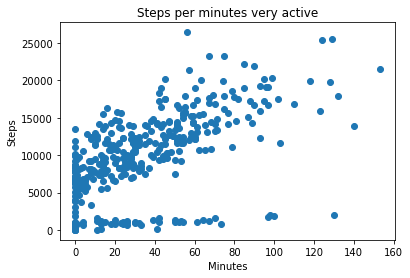

In [67]:
# your answer here
import matplotlib.pyplot as plt

plt.scatter(x=fitbit['Minutes Very Active'],y=fitbit['Steps'])
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.title('Steps per minutes very active')
plt.show()


#### What can you say about Minute Very Active and Steps? Write a comment below

In [ ]:
# your answer here
"""
I can see a linear relationship between these too variables. Generally, when the minutes increase, the steps increase as well.
However, there are multiple outliers - situations where you have 100 minutes and zero steps. 

"""

#### We also suspect that there must be a linear relationship between the Minutes Sedentary and the Steps. Compute the correlation between these variables.

In [70]:
# your answer here
corr=fitbit[['Minutes Sedentary','Steps']].corr()
corr


,Minutes Sedentary,Steps
Minutes Sedentary,1.000000,0.076906
Steps,0.076906,1.000000


#### Use matplotlib to visually plot Minutes Sedentary vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

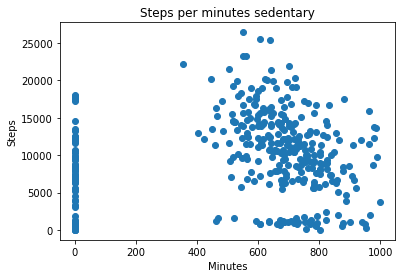

In [71]:
# your answer here
plt.scatter(x=fitbit['Minutes Sedentary'],y=fitbit['Steps'])
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.title('Steps per minutes sedentary')
plt.show()


In [ ]:
"""
There is no linear relationship between these two variables.
"""

#### We also suspect that there must be a linear relationship between the MinutesOfSleep and the Steps. Compute the correlation between these variables.

In [72]:
# your answer here
corr=fitbit[['MinutesOfSleep','Steps']].corr()
corr

,MinutesOfSleep,Steps
MinutesOfSleep,1.000000,0.130986
Steps,0.130986,1.000000


#### Use matplotlib to visually plot MinutesOfSleep vs Steps. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

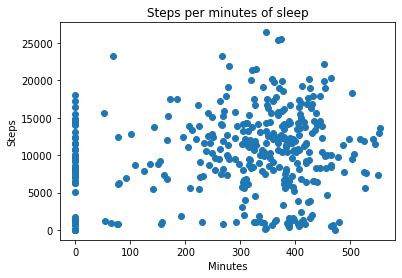

In [73]:
# your answer here
plt.scatter(x=fitbit['MinutesOfSleep'],y=fitbit['Steps'])
plt.xlabel('Minutes')
plt.ylabel('Steps')
plt.title('Steps per minutes of sleep')
plt.show()


In [ ]:
"""
There is no linear relationship between these two variables.
"""

#### Select a subset of your dataset with the columns below and compute the correlation matrix. Save the results in the variable `cor_fit`
column= ['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']

In [78]:
# your answer here
import seaborn as sns
corr=fitbit[['Calorie burned', 'Steps','Floors','Minutes Sedentary','Minutes Very Active', 'MinutesOfSleep']].corr()
corr

,Calorie burned,Steps,Floors,Minutes Sedentary,Minutes Very Active,MinutesOfSleep
Calorie burned,1.000000,0.255305,0.130757,0.125353,0.197881,0.011485
Steps,0.255305,1.000000,0.306511,0.076906,0.571452,0.130986
Floors,0.130757,0.306511,1.000000,0.057812,0.399503,0.069464
Minutes Sedentary,0.125353,0.076906,0.057812,1.000000,0.105963,0.204242
Minutes Very Active,0.197881,0.571452,0.399503,0.105963,1.000000,0.108018
MinutesOfSleep,0.011485,0.130986,0.069464,0.204242,0.108018,1.000000


#### Based on the result of the correlation matrix. What are the highly correlated features with the variable Steps?
*Hint: From the results above select the variable Steps and order your results in descending order (use Pandas sort_values function)*

In [82]:
# your answer here
d=corr[['Steps']].sort_values(by='Steps',ascending=False)
d

,Steps
Steps,1.000000
Minutes Very Active,0.571452
Floors,0.306511
Calorie burned,0.255305
MinutesOfSleep,0.130986
Minutes Sedentary,0.076906


In [ ]:
"""
The highest correlated variable is the variable Minutes Very Active 
"""

# Challenge 3

#### Open the `Time_Grades.csv` file and name your dataset `time_grades`.

In [84]:
# your answer here

time_grades=pd.read_csv('data/Time_Grades.csv')
time_grades

,Name,Study time,Grade
0,Jose,4,4
1,Maria,9,7
2,David,8,9
3,Sonia,10,7
4,Samuel,20,9
5,Eva,5,3
6,Carlos,12,7
7,Pedro,6,5
8,Ana,18,9
9,Gervasio,7,3


#### Show visually the frequency distribution of the time_grades dataset.

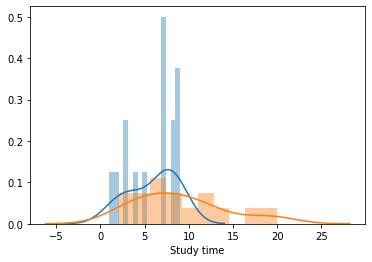

In [101]:
# your answer here
sns.distplot(time_grades['Grade'],bins=15)
sns.distplot(time_grades['Study time'],bins=10)

#### Is there a correlation between study time and Grade? Use both Pearson and Spearman correlation and comment your results.

In [95]:
# your answer here
corr_pearson=time_grades[['Study time','Grade']].corr(method='pearson')
corr_spearman=time_grades[['Study time','Grade']].corr(method='spearman')
corr_pearson

,Study time,Grade
Study time,1.000000,0.798046
Grade,0.798046,1.000000


In [ ]:
"""
The Spearman correlation for these two variables is higher than the Pearson correlation.
"""

#### Use matplotlib to visually plot Study time vs Grade. Based on the results of the computed correlation and the plot. What can you say about these 2 variables?

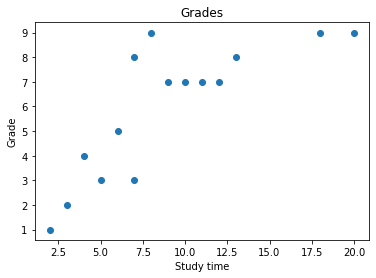

In [94]:
# your answer here
plt.scatter(x=time_grades['Study time'],y=time_grades['Grade'])
plt.xlabel('Study time')
plt.ylabel('Grade')
plt.title('Grades')
plt.show()



#### Could you explain the difference between Pearson and Spearman correlation? (see References in README.md) 

In [ ]:
# your answer here

"""
The Pearson correlation coefficient is the most widely used. It measures the strength of the linear 
relationship between normally distributed variables. When the variables are not normally distributed 
or the relationship between the variables is not linear, it may be more appropriate to use the Spearman rank correlation method.
Pearson is most appropriate for measurements taken from an interval scale, while the Spearman is best for measurements 
taken from ordinal scales.

"""
